In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv")
df.head()

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize


#### Checking for correlation between the input numerical features (this does not include the target feature total_claim_amount)

In [2]:
correlations = df.corr()
print(correlations)

                               customer_lifetime_value    income  \
customer_lifetime_value                       1.000000  0.003732   
income                                        0.003732  1.000000   
monthly_premium_auto                          0.404235 -0.002431   
months_since_last_claim                       0.011912 -0.026564   
months_since_policy_inception                 0.017055  0.003846   
number_of_open_complaints                    -0.032371  0.018903   
number_of_policies                            0.016789 -0.004461   
total_claim_amount                            0.232849 -0.111221   

                               monthly_premium_auto  months_since_last_claim  \
customer_lifetime_value                    0.404235                 0.011912   
income                                    -0.002431                -0.026564   
monthly_premium_auto                       1.000000                 0.010036   
months_since_last_claim                    0.010036                

#### 0.4 is highly correlating: therefore dropping customer_lifetime_value (monthly_premium_auto stays because it is better understandable and also has high correlation with target value total_claim_amount)

In [3]:
df.drop(columns=["customer_lifetime_value"], inplace=True)

In [4]:
df.head()

,region,response,coverage,education,effective_to_date,month,employment_status,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,48029,suburban,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,92260,suburban,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,22139,suburban,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,49078,suburban,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,suburban,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize


#### Task: One Hot/Label Encoding the categorical variables in the categoricals data frame that you created in Activity 3. (Hint: check Dropfirst option)

In [5]:
help(pd.get_dummies)

Help on function get_dummies in module pandas.core.reshape.reshape:

get_dummies(data, prefix=None, prefix_sep='_', dummy_na: 'bool' = False, columns=None, sparse: 'bool' = False, drop_first: 'bool' = False, dtype: 'Dtype | None' = None) -> 'DataFrame'
    Convert categorical variable into dummy/indicator variables.
    
    Parameters
    ----------
    data : array-like, Series, or DataFrame
        Data of which to get dummy indicators.
    prefix : str, list of str, or dict of str, default None
        String to append DataFrame column names.
        Pass a list with length equal to the number of columns
        when calling get_dummies on a DataFrame. Alternatively, `prefix`
        can be a dictionary mapping column names to prefixes.
    prefix_sep : str, default '_'
        If appending prefix, separator/delimiter to use. Or pass a
        list or dictionary as with `prefix`.
    dummy_na : bool, default False
        Add a column to indicate NaNs, if False NaNs are ignored.
  

In [6]:
pd.get_dummies(df, drop_first=True)

,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,region_east,region_north west,region_west region,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,48029,61,7,52,0,9,292,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,92260,64,3,26,0,1,744,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,22139,100,34,31,0,2,480,1,0,0,...,0,1,0,0,0,0,1,0,1,0
3,49078,97,10,3,0,2,484,0,1,0,...,1,0,0,0,0,0,0,0,1,0
4,23675,117,33,31,0,7,707,0,1,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,61541,253,12,40,0,7,1214,0,0,0,...,0,0,1,1,0,0,0,0,1,0
10685,61146,65,7,68,0,6,273,0,1,0,...,1,0,0,0,0,0,0,0,1,0
10686,39837,201,11,63,0,2,381,0,0,0,...,0,0,1,0,1,0,0,0,1,0
10687,64195,158,0,27,4,6,618,0,0,1,...,1,0,0,0,0,0,1,0,1,0


#### Getting the numeric data into new separate dataframe

In [7]:
numeric = df.select_dtypes(include=np.number)

In [8]:
numeric

,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,48029,61,7,52,0,9,292
1,92260,64,3,26,0,1,744
2,22139,100,34,31,0,2,480
3,49078,97,10,3,0,2,484
4,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...
10684,61541,253,12,40,0,7,1214
10685,61146,65,7,68,0,6,273
10686,39837,201,11,63,0,2,381
10687,64195,158,0,27,4,6,618


### Optional Task by Peter Zimmerman

#### Begin by visually examining distributions (histograms) of the numerical features

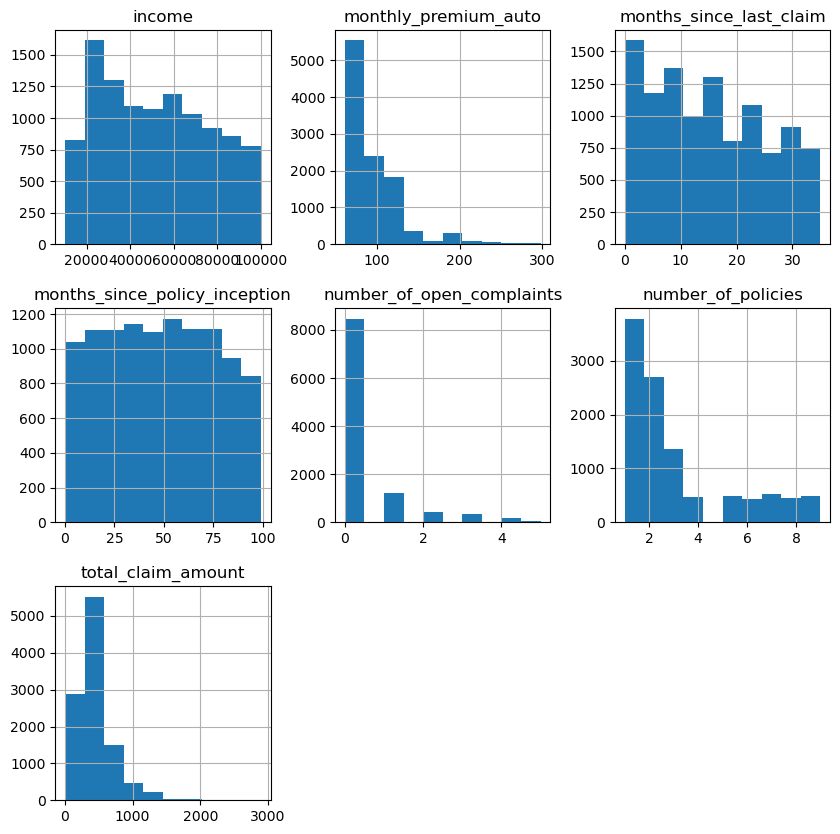

In [9]:
_=numeric.hist(figsize=(10,10))

#### Select a variable, call it varA, which takes on a wide range of numerical values 

## VarA = Income

#### And another, varB, which has noticeably large skew (slanted with respect to the mean). For example, you might select customer_lifetime_value as a candidate varB which has skew
--> positive skew > normal distribution > negative skew

In [10]:
df_with_clv = pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv")

In [11]:
numeric_with_clv = df_with_clv.select_dtypes(include=np.number)

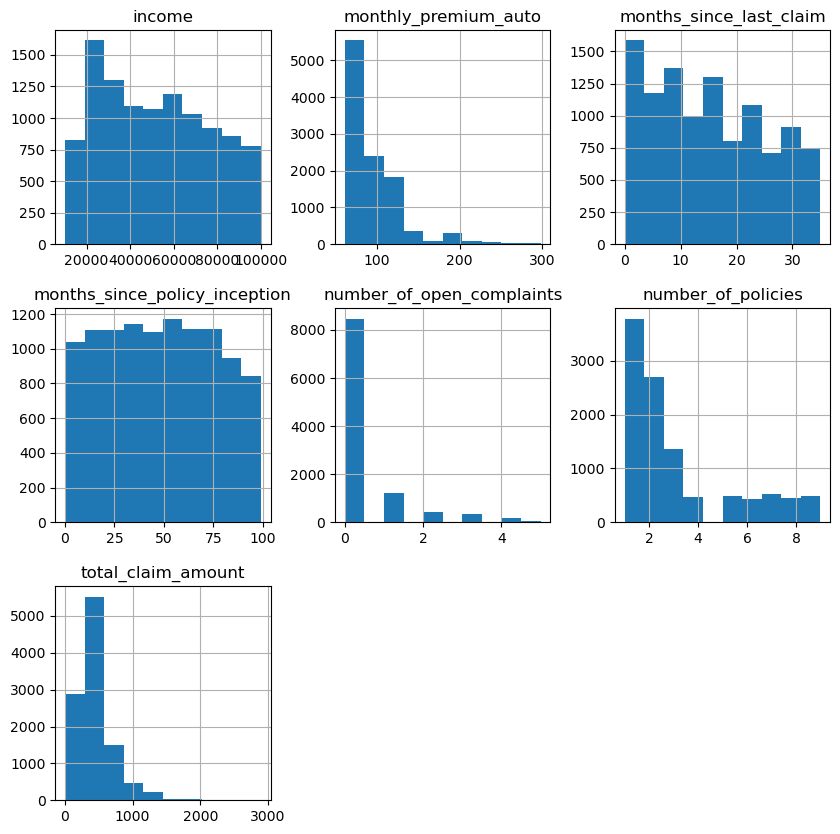

In [12]:
_=numeric.hist(figsize=(10,10))

In [13]:
mean_monthly_premium_auto = df["monthly_premium_auto"].mean()

In [14]:
mean_monthly_premium_auto

93.19019552811301

## VarB = monthly_premium_auto

#### Transforming a wide range of numerical values using minmax scaler to bring varA's values into the range [0,1]

In [15]:
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler

In [16]:
scaler = MinMaxScaler()
scaler.fit(numeric[['income']])
numeric["income_scaled"] = scaler.transform(numeric[["income"]])

#### Checking that varA has been rescaled using a distplot or a histogram

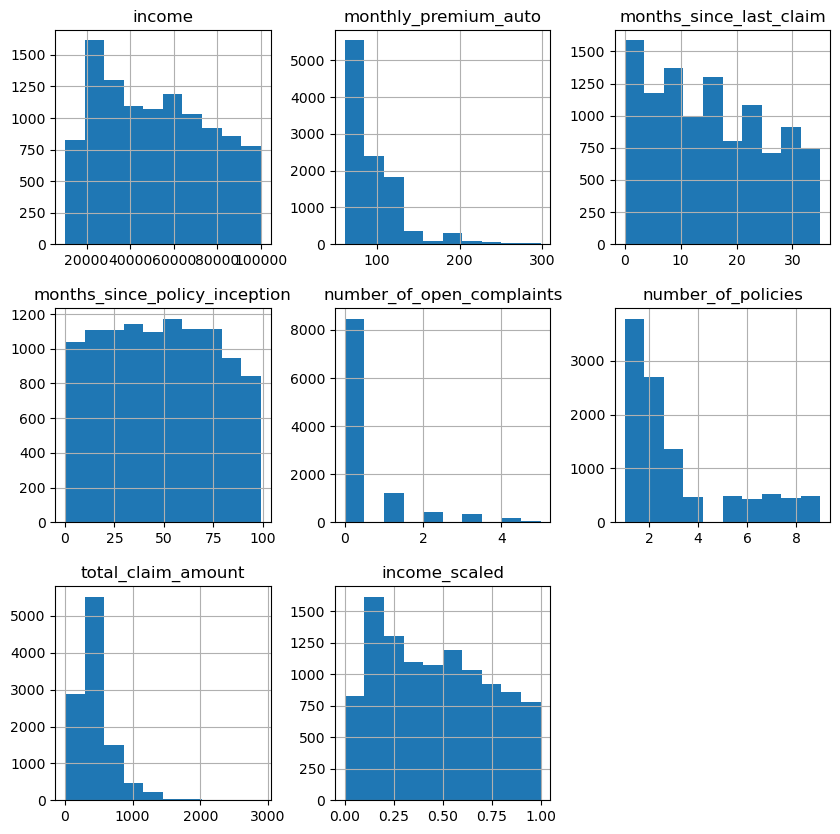

In [17]:
_=numeric.hist(figsize=(10,10))

##  Reducing the skew and standardizing varB's distribution with StandardScaler and PowerTransformer

In [20]:
scaler = StandardScaler()
scaler.fit(numeric[["monthly_premium_auto"]])
numeric["mpa_scaled_standard"] = scaler.transform(numeric[["monthly_premium_auto"]])

In [24]:
scaler = PowerTransformer()
scaler.fit(numeric[["monthly_premium_auto"]])
numeric["mpa_scaled_powertransform"] = scaler.transform(numeric[["monthly_premium_auto"]])

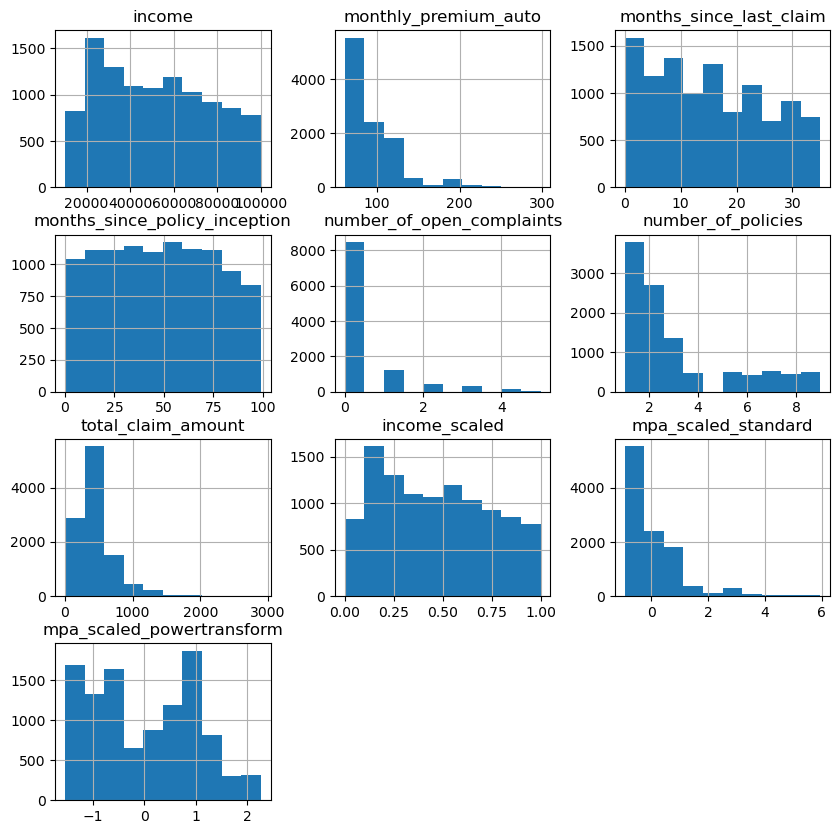

In [25]:
_=numeric.hist(figsize=(10,10))

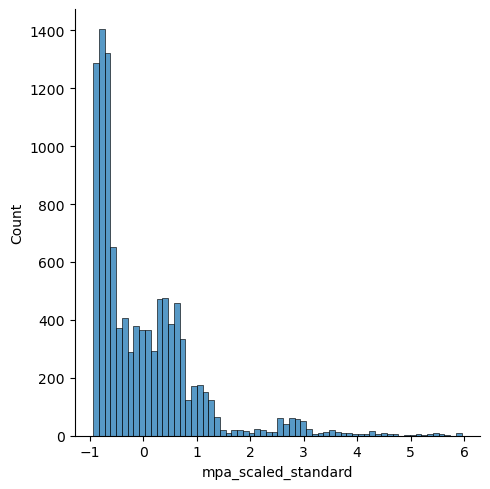

In [28]:
sns.displot(numeric["mpa_scaled_standard"])

### Checking that the result has zero mean, unit variance, and reduced skew using mean(), std()

In [26]:
numeric["mpa_scaled_standard"].mean()

1.5975100786085902e-16

In [27]:
numeric["mpa_scaled_standard"].std()

1.0000467803429185

In [29]:
numeric["mpa_scaled_powertransform"].mean()

-1.7393328905617382e-13

In [30]:
numeric["mpa_scaled_powertransform"].std()

1.0000467803429274

### Plotting the PDF (see above histograms)